In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
import statsmodels.stats.outliers_influence as oi
import seaborn as sns
import pylab as py

In [2]:
data = pd.read_csv("./data/final_data/data.csv")
data = data.rename(columns={"team_won_finals": "team_won_nba_finals"})
data = data.rename(columns={"team_lost_finals": "team_lost_nba_finals"})
data = data.rename(columns={"team_lost_semifinals": "team_lost_conf_finals"})
data = data.rename(columns={"team_lost_first_match": "team_exit_before_conf_finals"})
print(len(data))

2175


In [3]:
n = len(pd.unique(data['ID']))
print(n)

855


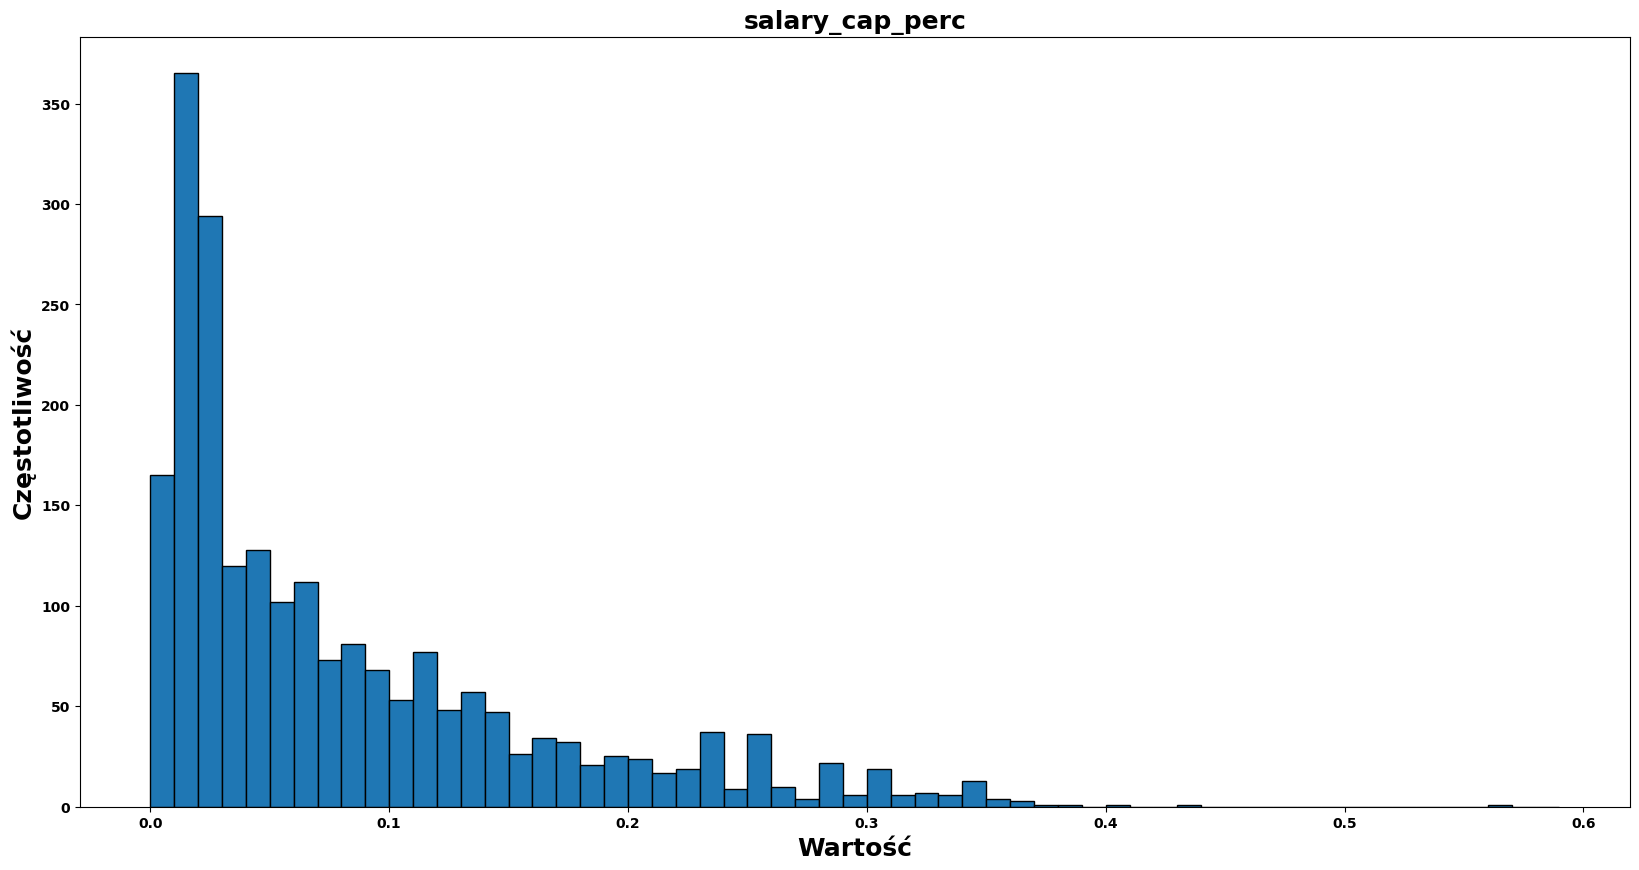

In [4]:
# salary_cap_perc plot

plt.rcParams['font.weight'] = 'bold'

# Create a figure
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the histogram
x_label_vals = np.arange(0.0, 0.60, 0.01)
ax.hist(data["salary_cap_perc"], bins=x_label_vals, edgecolor='black')

# Set the title, x-axis label, and y-axis label
ax.set_title('salary_cap_perc', weight='bold', fontsize=18)
ax.set_xlabel('Wartość', weight='bold', fontsize=18)
ax.set_ylabel('Częstotliwość', weight='bold', fontsize=18)

# Show the plot
plt.show()



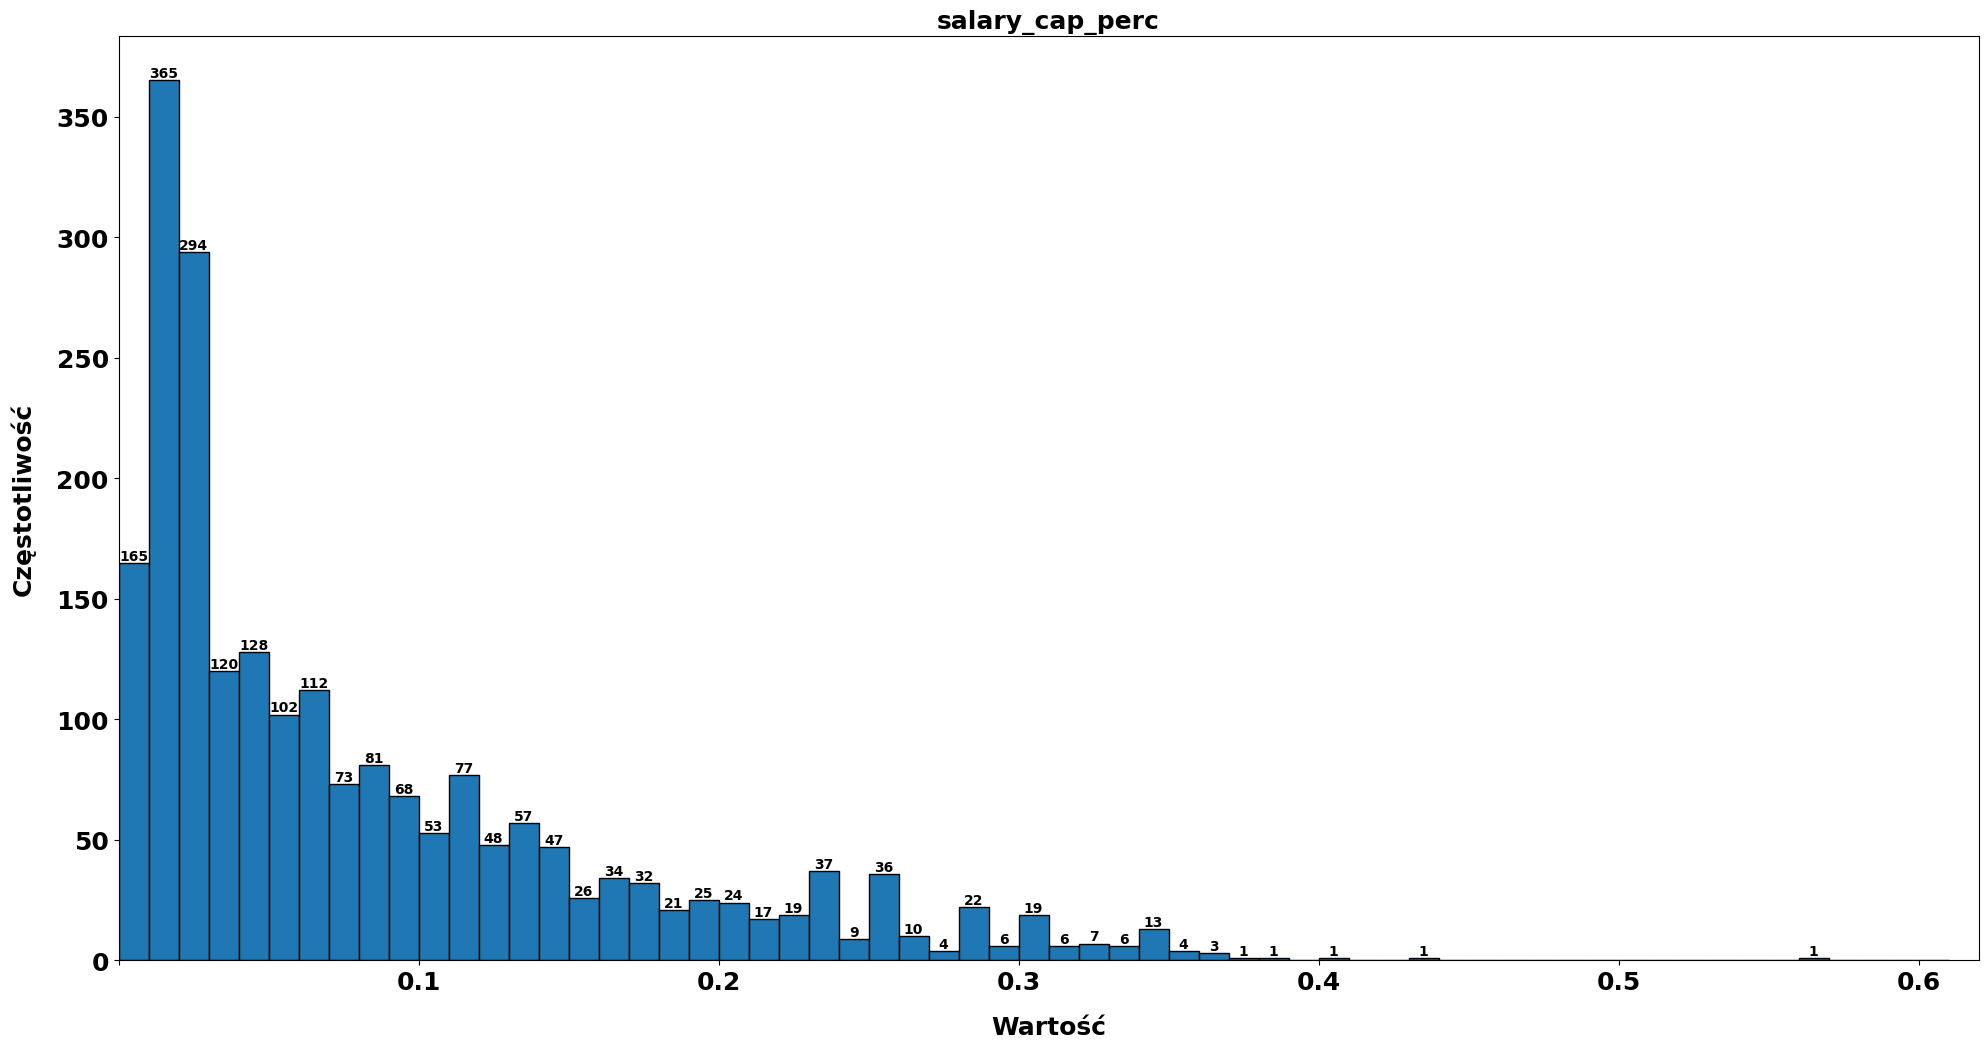

In [5]:
# salary_cap_perc plot

# Set up the figure
plt.figure(figsize=(24, 12))
plt.rcParams['font.weight'] = 'bold'

# Creating bins from 0.0 to 0.6 with steps of 0.02
bins = np.arange(0.0, 0.62, 0.01)

# Creating the histogram
counts, bins, patches = plt.hist(data["salary_cap_perc"], bins=bins, edgecolor='black')

# Adding the number of observations on each bar
for count, patch in zip(counts, patches):
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height,
                str(int(count)), ha='center', va='bottom',
                fontweight='bold', color='black', fontsize=10)

# Adjusting x and y axis labels
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('Wartość', weight='bold', fontsize=18, labelpad=15)
plt.ylabel('Częstotliwość', weight='bold', fontsize=18, labelpad=15)

# Setting the title
plt.title('salary_cap_perc', weight='bold', fontsize=18)

# Setting the x-axis limits and custom tick labels
plt.xlim(-0.00001, 0.62)  # Adjust x-axis limits to start slightly before 0
# plt.xticks(np.arange(0.0, 0.61, 0.1))  # Set x-axis ticks with a step of 0.1
x_ticks = np.arange(0.0, 0.62, 0.1)
x_tick_labels = [str(tick.round(1)) if tick != 0 else '' for tick in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

# Show the plot
plt.show()

In [6]:
all_data_to_plot = data.drop(columns=["ID", "season", "salary_cap_perc"])
sport_stats_cols = ['games_played_perc', 'games_started_perc', 'minutes_played', 'avg_minutes_played', 'WS48', 'PER']
team_successes_cols = ['team_won_nba_finals', 'team_lost_nba_finals', 'team_lost_conf_finals', 'team_exit_before_conf_finals']
player_successes_cols = ['most_improved', 'most_valuable', 'most_valuable_finals', 'sixth_man', 'all_league']
successes_cols = ['team_won_nba_finals', 'team_lost_nba_finals', 'team_lost_conf_finals', 'team_exit_before_conf_finals', 'most_improved', 'most_valuable', 'most_valuable_finals', 'sixth_man', 'all_league']

In [7]:
age = all_data_to_plot["age"].copy()
len(all_data_to_plot[(all_data_to_plot["age"] < 30)].index)

1581

In [8]:
len(data[(data["salary_cap_perc"] < 0.05)].index) / len(data)

0.4928735632183908

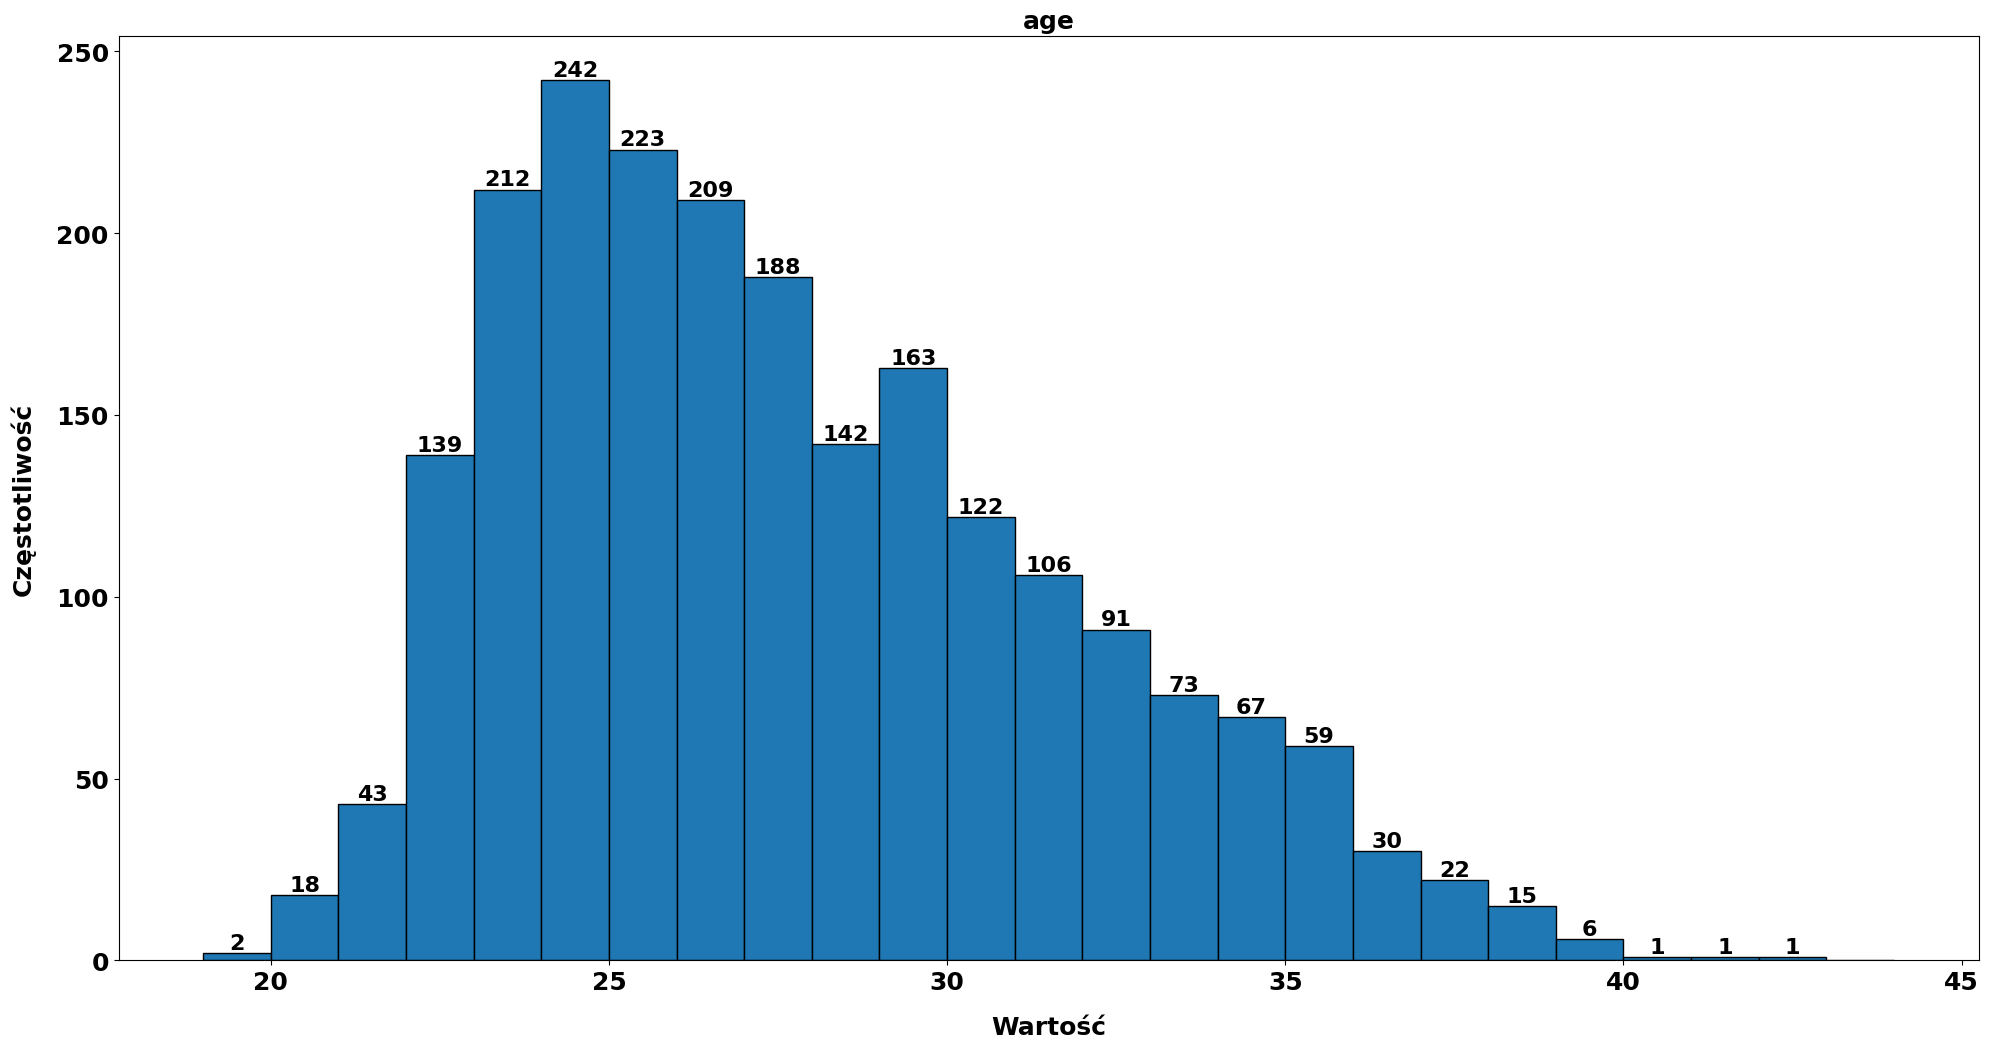

In [9]:
# age histogram

# Set up the figure
plt.figure(figsize=(24, 12))
plt.rcParams['font.weight'] = 'bold'

# Creating the histogram
counts, bins, patches = plt.hist(data["age"], bins=range(19, 45, 1), edgecolor='black')

# Adding the number of observations on each bar
for count, patch in zip(counts, patches):
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height,
             str(int(count)), ha='center', va='bottom',
             fontweight='bold', color='black', fontsize=16)

# Adjusting x and y axis labels
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('Wartość', weight='bold', fontsize=18, labelpad=15)
plt.ylabel('Częstotliwość', weight='bold', fontsize=18, labelpad=15)

# Setting the title
plt.title('age', weight='bold', fontsize=18)

# Show the plot
plt.show()

/var/folders/8k/jkxj5v5545j6jgj7pfxxzpmc0000gn/T/ipykernel_52796/2219487416.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


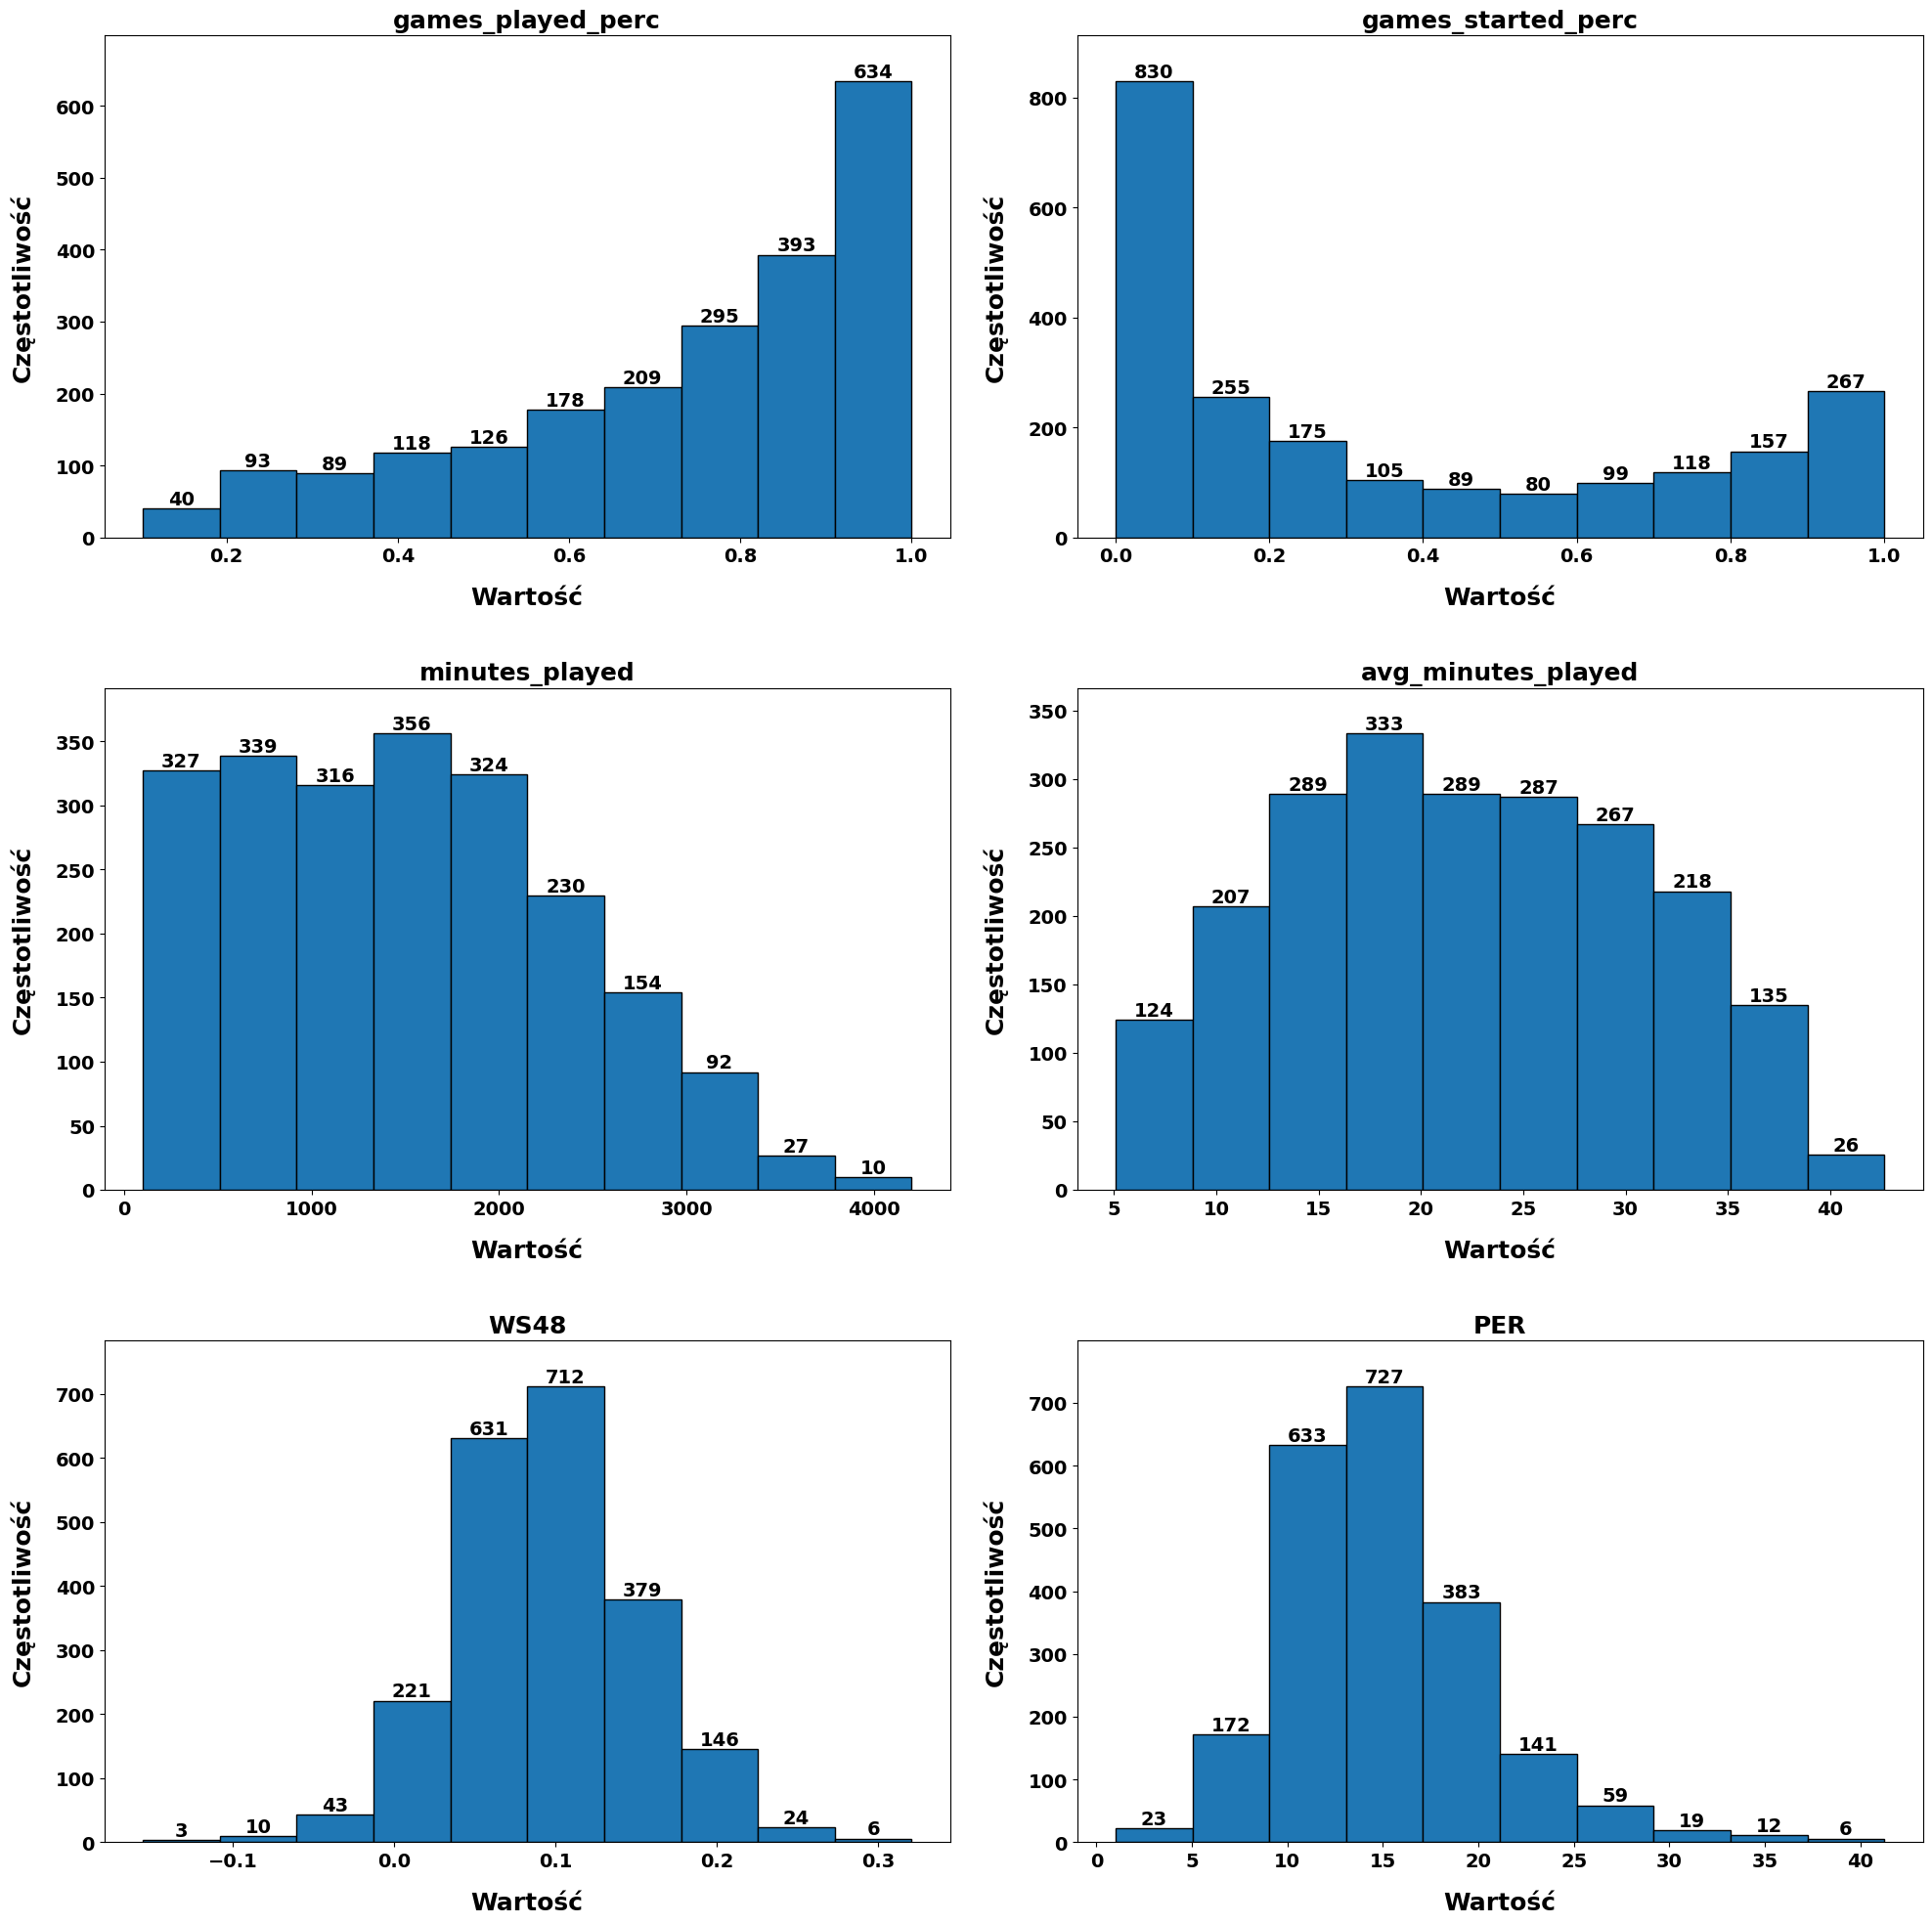

In [10]:
# sport stats plot
sport_stats = all_data_to_plot[sport_stats_cols].copy()


fig = plt.figure(figsize=(24, 24))  # Adjust size as needed
plt.rcParams['font.weight'] = 'bold'
gs = gridspec.GridSpec(3, 2, wspace=0.15, hspace=0.3)

for i, column in enumerate(sport_stats):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    counts, bins, patches = ax.hist(sport_stats[column], edgecolor='black')  # Histogram with black edges

    max_count = max(counts)

    # Adding the number of observations on each bar
    for count, patch in zip(counts, patches):
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
                str(int(count)), ha='center', va='bottom',
                fontweight='bold', fontsize=14, color='black')

    # Setting the y-axis upper limit
    ax.set_ylim(0, max_count * 1.1)  # 10% more than the highest bar

    # Increasing font size of x and y axis labels
    ax.tick_params(axis='x', labelsize=14)  # Increase x-axis label font size
    ax.tick_params(axis='y', labelsize=14)  # Increase y-axis label font size

    # Setting titles and labels
    ax.set_title(f'{column}', weight='bold', fontsize=18)
    ax.set_xlabel('Wartość', weight='bold', fontsize=18, labelpad=15)
    ax.set_ylabel('Częstotliwość', weight='bold', fontsize=18, labelpad=15)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/8k/jkxj5v5545j6jgj7pfxxzpmc0000gn/T/ipykernel_52796/1805930279.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


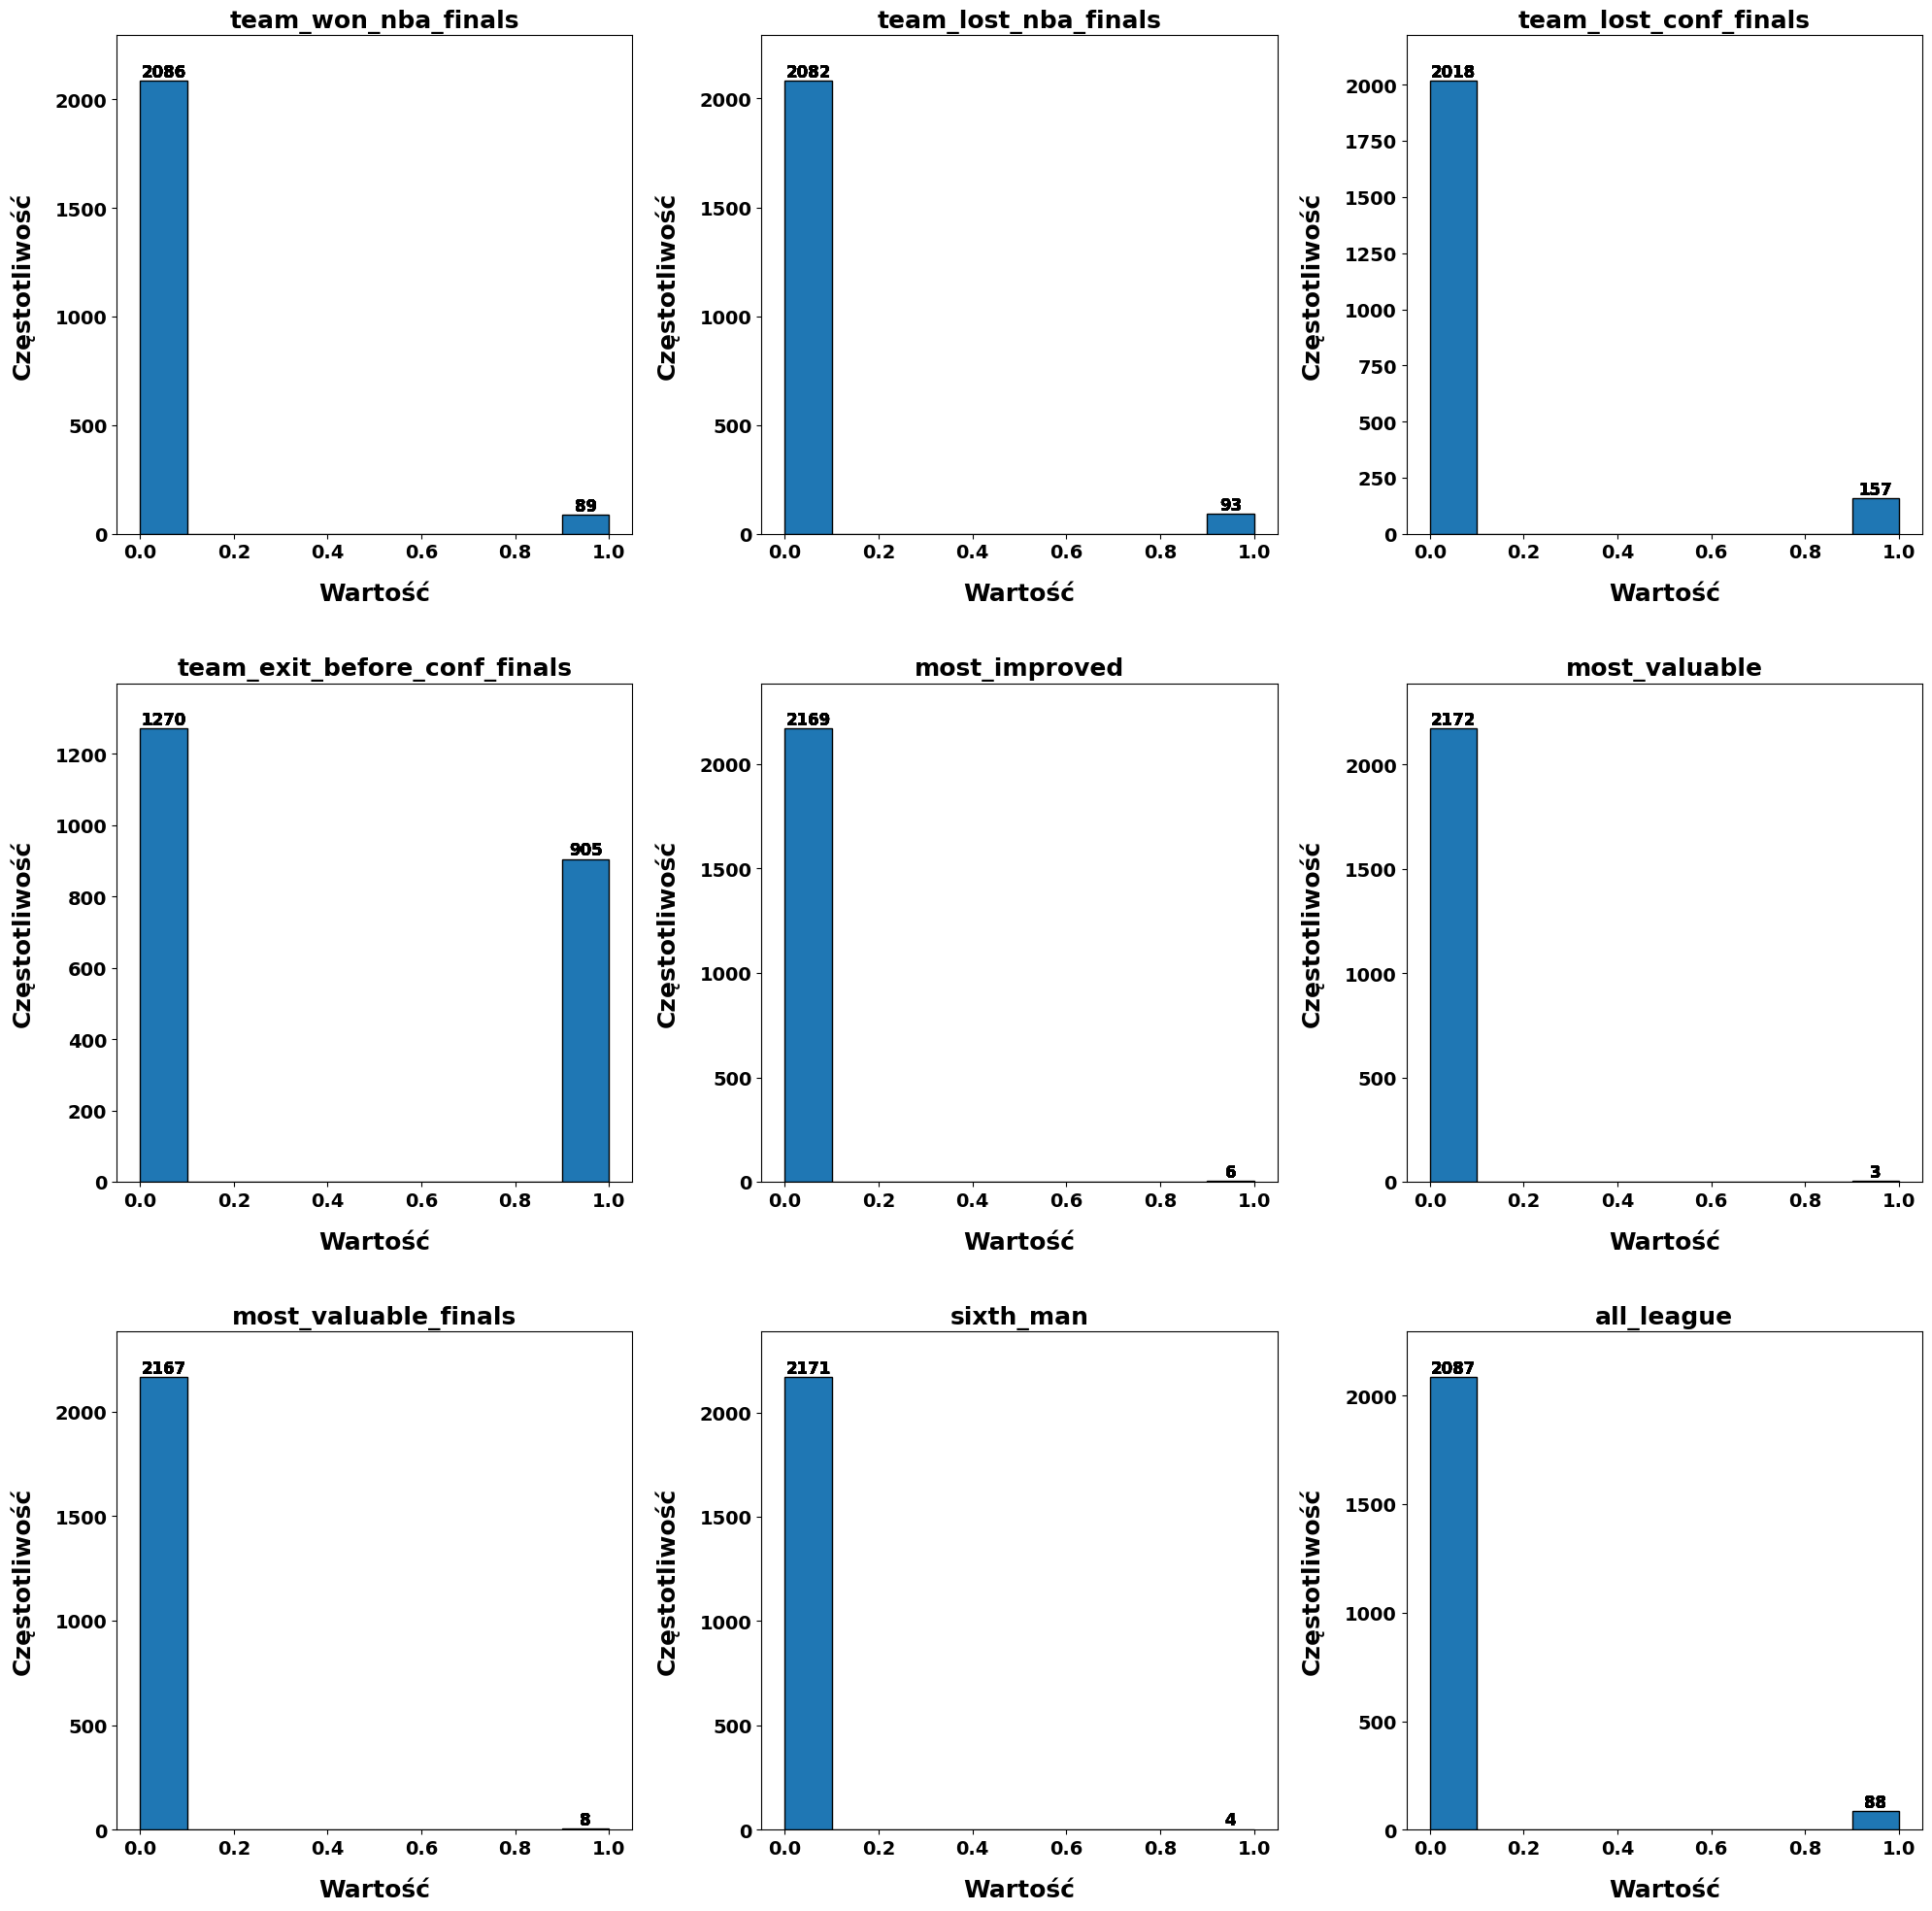

In [11]:
# successes plot
successes= all_data_to_plot[successes_cols].copy()

fig = plt.figure(figsize=(24, 24))  # Adjust size as needed
plt.rcParams['font.weight'] = 'bold'
gs = gridspec.GridSpec(3, 3, wspace=0.25, hspace=0.3)

for i, column in enumerate(successes):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    counts, bins, patches = ax.hist(successes[column], edgecolor='black')  # Histogram with black edges

    max_count = max(counts)

    # Adding the number of observations on each bar
    for count, patch in zip(counts, patches):
        for count, patch in zip(counts, patches):
            height = patch.get_height()
            if height > 0:
                ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
                        str(int(count)), ha='center', va='bottom',
                        fontweight='bold', fontsize=12, color='black')

    # Setting the y-axis upper limit
    ax.set_ylim(0, max_count * 1.1)  # 10% more than the highest bar

    # Increasing font size of x and y axis labels
    ax.tick_params(axis='x', labelsize=14)  # Increase x-axis label font size
    ax.tick_params(axis='y', labelsize=14)  # Increase y-axis label font size

    # Setting titles and labels
    ax.set_title(f'{column}', weight='bold', fontsize=18)
    ax.set_xlabel('Wartość', weight='bold', fontsize=18, labelpad=15)
    ax.set_ylabel('Częstotliwość', weight='bold', fontsize=18, labelpad=15)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

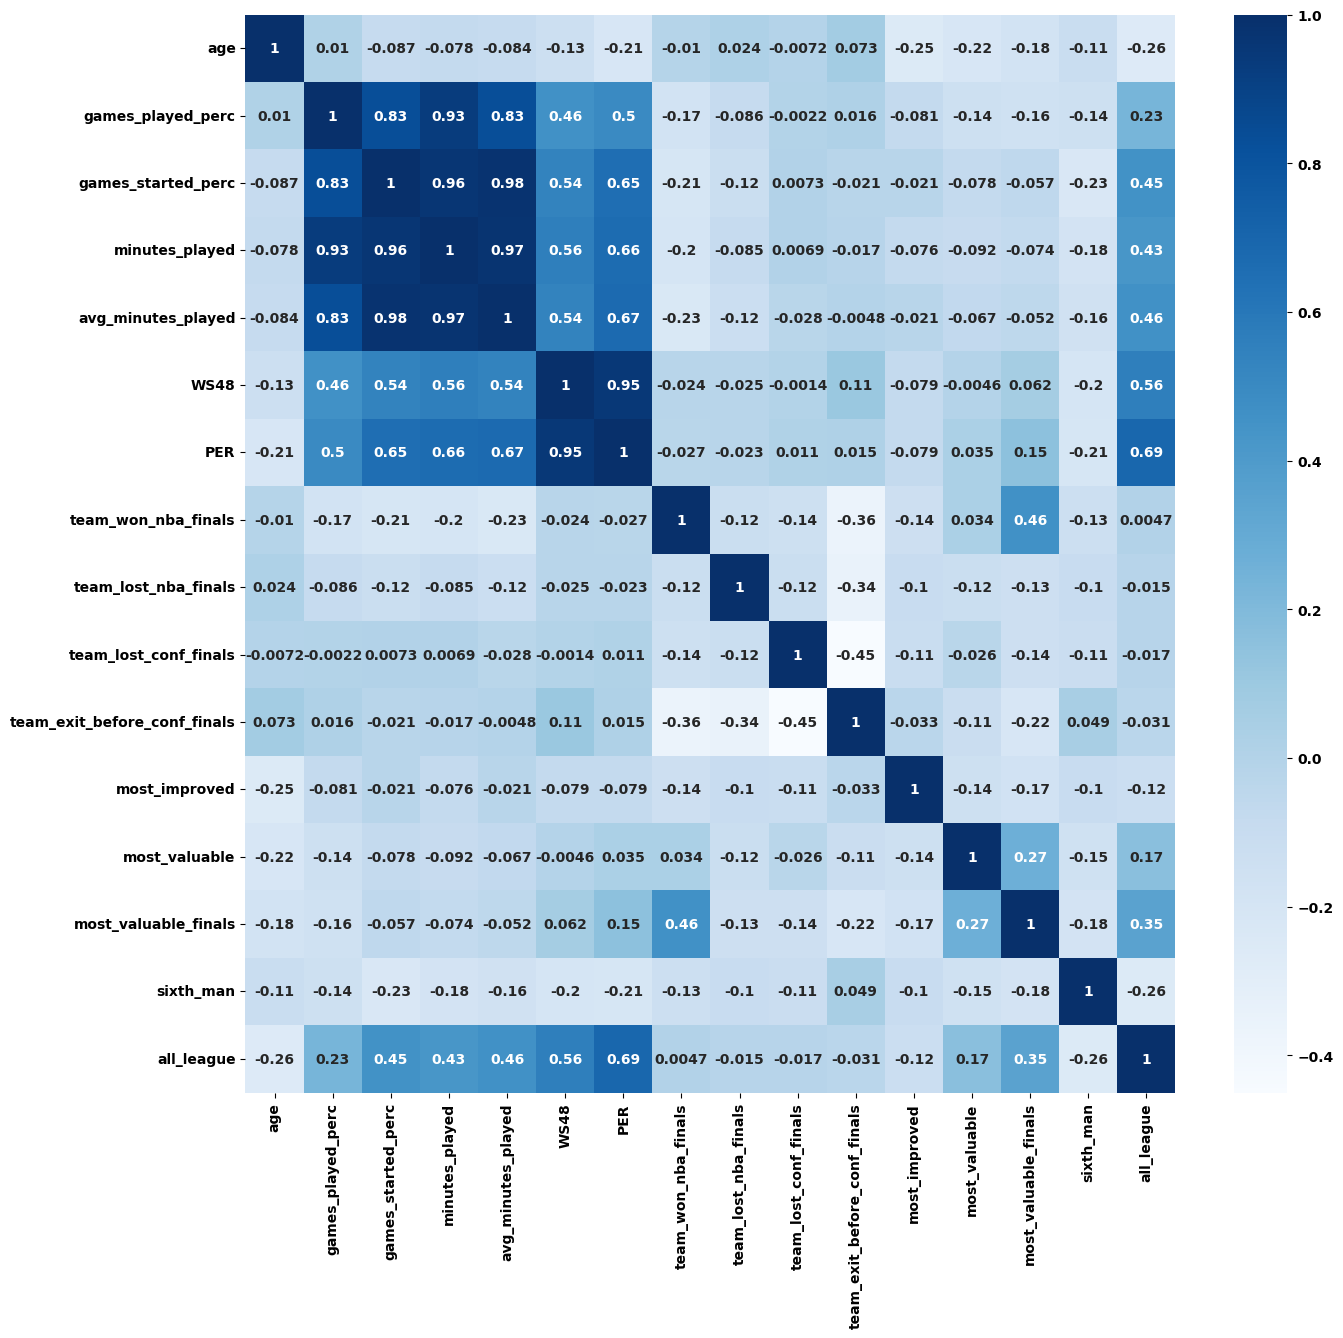

In [12]:
fig, ax = plt.subplots(figsize=(15,14))
htmp_data = all_data_to_plot.corr()
sns.heatmap(htmp_data.corr(), annot=True, cmap='Blues', fmt='.2g',
            annot_kws={'size': 10, 'weight': 'bold'})
plt.show()

In [ ]:
X_train = pd.read_csv("./data/final_data/X_train.csv", encoding='utf-8')
X_test = pd.read_csv("./data/final_data/X_test.csv", encoding='utf-8')
y_train = pd.read_csv("./data/final_data/y_train.csv", encoding='utf-8')
y_test = pd.read_csv("./data/final_data/y_test.csv", encoding='utf-8')

In [ ]:
X_train = X_train.rename(columns={'team_exit_before_conf_finals': 'team_exit_before_conf_finals'})
X_test = X_test.rename(columns={'team_exit_before_conf_finals': 'team_exit_before_conf_finals'})
y_train = y_train.rename(columns={'team_exit_before_conf_finals': 'team_exit_before_conf_finals'})
y_test = y_test.rename(columns={'team_exit_before_conf_finals': 'team_exit_before_conf_finals'})

In [ ]:
X_train_log = X_train.copy()
X_train_log = X_train_log.drop(columns=["ID", "season", "games_started_perc", "minutes_played", "PER"])
# X_train_log["age"] = X_train_log["age"].apply(lambda x: np.log2(x))
X_test_log = X_test.copy()
X_test_log = X_test_log.drop(columns=["ID", "season", "games_started_perc", "minutes_played", "PER"])
# X_test_log["age"] = X_test_log["age"].apply(lambda x: np.log2(x))
y_train_log = y_train.copy()
y_train_log["salary_cap_perc"] = y_train_log["salary_cap_perc"].apply(lambda x: np.log(x))
y_test_log = y_test.copy()
y_test_log["salary_cap_perc"] = y_test_log["salary_cap_perc"].apply(lambda x: np.log(x))

In [ ]:
reg_base = sm.OLS(y_train_log, X_train_log)
results_base = reg_base.fit()
print(results_base.summary())

In [ ]:
# White standard errors
robust_results_base = results_base.get_robustcov_results(cov_type='HC3')  # 'HC3' is one of the types of White standard errors
print(robust_results_base.summary())

In [ ]:
cols_to_drop = ["sixth_man"]

In [ ]:
cols_to_drop = ["sixth_man", "most_improved"]

In [ ]:
cols_to_drop = ["sixth_man", "most_improved", "most_valuable_finals"]

In [ ]:
cols_to_drop = ["sixth_man", "most_improved", "most_valuable_finals", "all_league"]

In [ ]:
cols_to_drop = ["sixth_man", "most_improved", "most_valuable_finals", "all_league", "age"]

In [ ]:
X_train_log_slim = X_train_log.copy()
X_train_log_slim = X_train_log_slim.drop(columns=cols_to_drop)
X_test_log_slim = X_test_log.copy()
X_test_log_slim = X_test_log_slim.drop(columns=cols_to_drop)

In [ ]:
reg_simple = sm.OLS(y_train_log, X_train_log_slim)
results_simple = reg_simple.fit()
robust_results_simple = results_simple.get_robustcov_results(cov_type='HC3')  # 'HC3' is one of the types of White standard errors
print(robust_results_simple.summary())

In [ ]:
# Extract parameter names directly from the model's exogenous names
params_base = robust_results_base.model.exog_names
params_simple = robust_results_simple.model.exog_names
print(params_base)
print(params_simple)

# Identify parameters that are in the base model but not in the simplified model
params_to_test = [param for param in params_base if param not in params_simple]

# Perform the Wald test
wald_test = robust_results_base.wald_test(params_to_test)
print(f"Wald Test Statistic: {wald_test.statistic}")
print(f"P-value: {wald_test.pvalue}")

In [ ]:
cols_for_drop = ["sixth_man", "most_improved", "most_valuable_finals", "all_league", "age", "games_started_perc", "minutes_played", "PER"]
mvps = data[data["most_valuable"] == 1]
mvps = mvps.drop(columns=cols_for_drop)
mvps

In [ ]:
results_np = sm.OLS(robust_results_simple.model.endog, robust_results_simple.model.exog).fit()

In [ ]:
# RESET TEST
reset_test = smd.linear_reset(res=results_np, use_f = True)

print(f"RESET test statistic: {reset_test.statistic}")
print(f"RESET p-value: {reset_test.pvalue}")

In [ ]:
# RESET TEST
reset_test = oi.reset_ramsey (robust_results_simple, degree = 2)

print(f"RESET test statistic: {reset_test.statistic}")
print(f"RESET p-value: {reset_test.pvalue}")

In [ ]:
# RAINBOW TEST
rainbow_statistic, rainbow_p_value = smd.linear_rainbow(results)

print(f"Rainbow statistic: {rainbow_statistic}")
print(f"Rainbow p-value: {rainbow_p_value}")

In [ ]:
# WHITE TEST
test_statistic, p_value, f_statistic, f_p_value = smd.het_white(robust_results_simple.resid, robust_results_simple.model.exog)

print(f"White statistic: {test_statistic}")
print(f"White p-value: {p_value}")
print(f"White F-statistic: {f_statistic}")
print(f"White F-test p-value: {f_p_value}")

In [ ]:
# BREUSCH-PAGAN TEST
lm_statistic, lm_p_value, f_statistic, f_p_value = smd.het_breuschpagan(robust_results_simple.resid, robust_results_simple.model.exog)

print(f"Breusch-Pagan statistic: {lm_statistic}")
print(f"Breusch-Pagan p-value: {lm_p_value}")
print(f"Breusch-Pagan F-statistic: {f_statistic}")
print(f"Breusch-Pagan F-test p-value: {f_p_value}")

In [ ]:
# bg_test_statistic, bg_p_value, f_statistic, f_p_value = smd.acorr_breusch_godfrey(results, nlags=1)

# print(f"Breusch-Godfrey statistic: {bg_test_statistic}")
# print(f"Breusch-Godfrey p-value: {bg_p_value}")
# print(f"Breusch-Godfrey F-statistic: {f_statistic}")
# print(f"Breusch-Godfrey F-test p-value: {f_p_value}")

In [ ]:
data_points = results_np.resid

In [ ]:
fig = sm.qqplot(data_points, line ='45')
fig.set_size_inches(12,8)
py.xlabel('Kwantyle teoretyczne', weight='bold', fontsize=14)
py.ylabel('Kwantyle empiryczne', weight='bold', fontsize=14)
py.show()

In [ ]:
influence = robust_results_simple.get_influence()
(C, P) = influence.cooks_distance

In [ ]:
import matplotlib.pyplot as plt

def plot_cooks_distance(c):
    _, ax = plt.subplots(figsize=(12,8))
    ax.stem(c, markerfmt=",")

    # Set labels and font settings
    ax.set_xlabel("Obserwacje", weight='bold', fontsize=14)
    ax.set_ylabel("Dystans", weight='bold', fontsize=14)

    # Adjust axis limits to remove gaps
    ax.set_xlim(left=-0, right=1750)  # Adjust as needed
    ax.set_ylim(bottom=0, top=0.02)  # Adjust as needed

    return ax

plot_cooks_distance(C)

In [ ]:
# get influential observations
n = len(C)
threshold = 0.015

# Get the indices of influential points
influential_indices = np.where(C > threshold)[0]

# Access the influential observations from the original data
# Assuming 'data' is your DataFrame containing the original dataset
influential_observations = data.iloc[influential_indices]

In [ ]:
# print influential observations
cols_for_drop_infl = ["sixth_man", "most_improved", "most_valuable_finals", "all_league", "age", "games_started_perc", "minutes_played", "PER"]
influential_observations = influential_observations.drop(columns=cols_for_drop_infl)

print(influential_observations)
len(influential_observations)

influential_observations.to_csv('./data/final_data/infl_obs.csv', index=False, encoding='utf-8')

In [ ]:
y_pred = robust_results_simple.predict(X_test_log_slim)
y_pred_result = np.exp(y_pred)

In [ ]:
# for residuales, convert df to series
y_test_series = y_test.squeeze()

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter(y_test_series, y_pred_result)
plt.xlabel('Wartości rzeczywiste', weight='bold', fontsize=14)
plt.ylabel('Predykcje', weight='bold', fontsize=14)
plt.plot([min(y_test_series), max(y_test_series)], [min(y_test_series), max(y_test_series)], color='red', linestyle='--')
plt.show()

In [ ]:
residuals = y_test_series - y_pred_result

# Create the histogram with default color
fig, ax = plt.subplots(figsize=(15, 9))
hist = sns.histplot(residuals, kde=True)  # Default color will be used

# Set labels
plt.xlabel('Reszty', weight='bold', fontsize=14)
plt.ylabel('Częstotliwość', weight='bold', fontsize=14)

# Annotate each bar with its count
for p in hist.patches:
    # Get the height and position of each bar
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Annotate the bar with its height (count)
    if height > 0:  # To avoid placing annotations for empty bins
        ax.annotate(f'{int(height)}', (x, height), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


In [ ]:
compare_data = X_test.copy()
cols_for_drop_comp = ["sixth_man", "most_improved", "most_valuable_finals", "all_league", "age", "games_started_perc", "minutes_played", "PER"]
compare_data = compare_data.drop(columns=cols_for_drop_comp)
compare_data["actual_salary_cap_as_perc"] = y_test
compare_data["predicted_salary_cap_as_perc"] = y_pred_result
compare_data["difference"] = compare_data["actual_salary_cap_as_perc"] - compare_data["predicted_salary_cap_as_perc"]

In [ ]:
MAE = np.mean(np.abs(compare_data["difference"]))
MSE = np.mean(compare_data["difference"]**2)
RMSE = np.sqrt(MSE)

In [ ]:
print("Mean Absolute Error (MAE):", MAE)
print("Root Mean Squared Error (RMSE):", RMSE)

In [ ]:
compare_data["actual_salary_cap_as_perc"].describe()

In [ ]:
compare_data["predicted_salary_cap_as_perc"].describe()

In [ ]:
len(compare_data[(compare_data.difference > 0)].index)

In [ ]:
# overvalued
len(compare_data[(compare_data.difference > MAE) and (compare_data.s)].index)

In [ ]:
overvalued_df = compare_data[(compare_data['difference'] > MAE) & (compare_data['actual_salary_cap_as_perc'] >= 0.05)]
len(overvalued_df)

In [ ]:
len(compare_data[(compare_data.difference < 0)].index)

In [ ]:
# undervalued
len(compare_data[(compare_data.difference < (-1*MAE))].index)

In [ ]:
undervalued_df = compare_data[(compare_data['difference'] < (-1*MAE)) & (compare_data['actual_salary_cap_as_perc'] >= 0.05)]
len(undervalued_df)

In [ ]:
errors = compare_data[(abs(compare_data["difference"]) > 0.09)]

In [ ]:
len(errors)

In [ ]:
# undervalued
undervalued_regression = errors.sort_values(by=['difference'])[:5]
undervalued_regression["games_played_perc"] = undervalued_regression["games_played_perc"].apply(lambda x: round((x*100), 2))
undervalued_regression["actual_salary_cap_as_perc"] = undervalued_regression["actual_salary_cap_as_perc"].apply(lambda x: round((x*100), 2))
undervalued_regression["predicted_salary_cap_as_perc"] = undervalued_regression["predicted_salary_cap_as_perc"].apply(lambda x: round((x*100), 2))
undervalued_regression["difference"] = undervalued_regression["difference"].apply(lambda x: round((x*-100), 2))
undervalued_regression.to_csv('./data/final_data/undervalued_regression.csv', index=False, encoding='utf-8')
undervalued_regression

In [ ]:
# overvalued
overvalued_regression = errors.sort_values(by=['difference'])[-5:]
overvalued_regression = overvalued_regression.sort_values(by=['difference'], ascending=False)
overvalued_regression["games_played_perc"] = overvalued_regression["games_played_perc"].apply(lambda x: round((x*100), 2))
overvalued_regression["actual_salary_cap_as_perc"] = overvalued_regression["actual_salary_cap_as_perc"].apply(lambda x: round((x*100), 2))
overvalued_regression["predicted_salary_cap_as_perc"] = overvalued_regression["predicted_salary_cap_as_perc"].apply(lambda x: round((x*100), 2))
overvalued_regression["difference"] = overvalued_regression["difference"].apply(lambda x: round((x*100), 2))
overvalued_regression.to_csv('./data/final_data/overvalued_regression.csv', index=False, encoding='utf-8')
overvalued_regression